# Wavy Nikurashin and Legg [2011]

In [27]:
import xarray as xr
import numpy as np
import xgcm
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

import warnings
warnings.filterwarnings('ignore', '.*FutureWarning*.')
warnings.filterwarnings('ignore', '.*.')

In [30]:

data_dir = "/nobackup1/hdrake/mitgcm_static/TurbulentCirculation/setups/wavynikurashinlegg_tracer_3D_NH/run"
ds = open_mdsdataset(data_dir,ignore_unknown_vars=True,prefix=["PTRACER01"])
ds['time'] = ds['time']*30 # convert from iterations to seconds
ds['time'].attrs['units'] = "seconds since 2000-1-1 0:0:0"
grid = xgcm.Grid(ds, periodic=['X','Y'])


In [31]:
ds

<xarray.Dataset>
Dimensions:    (XC: 100, XG: 100, YC: 100, YG: 100, Z: 350, Zl: 350, Zp1: 351, Zu: 350, time: 73)
Coordinates:
  * XC         (XC) >f8 15.0 45.0 75.0 105.0 135.0 165.0 195.0 225.0 255.0 ...
  * YC         (YC) >f8 15.0 45.0 75.0 105.0 135.0 165.0 195.0 225.0 255.0 ...
  * XG         (XG) >f8 0.0 30.0 60.0 90.0 120.0 150.0 180.0 210.0 240.0 ...
  * YG         (YG) >f8 0.0 30.0 60.0 90.0 120.0 150.0 180.0 210.0 240.0 ...
  * Z          (Z) >f8 -36.22 -108.0 -178.3 -247.2 -314.8 -381.1 -446.1 ...
  * Zp1        (Zp1) >f8 0.0 -72.45 -143.5 -213.1 -281.4 -348.3 -413.9 ...
  * Zu         (Zu) >f8 -72.45 -143.5 -213.1 -281.4 -348.3 -413.9 -478.3 ...
  * Zl         (Zl) >f8 0.0 -72.45 -143.5 -213.1 -281.4 -348.3 -413.9 -478.3 ...
    rA         (YC, XC) >f8 dask.array<shape=(100, 100), chunksize=(100, 100)>
    dxG        (YG, XC) >f8 dask.array<shape=(100, 100), chunksize=(100, 100)>
    dyG        (YC, XG) >f8 dask.array<shape=(100, 100), chunksize=(100, 100)>
    Depth     

In [ ]:
nu = 2.e-3
ds['EPSILON'] = nu*((grid.diff(ds['UVEL'], axis='X'))**2
               + grid.interp(grid.interp(grid.diff(ds['WVEL'], axis='X')**2,
                                         axis='Z', boundary = 'extend'), axis='X')
               + grid.interp(grid.interp(grid.diff(ds['UVEL'], axis='Z', boundary = 'extend')**2,
                                         axis='X'), axis='Z', boundary = 'extend')
               + (grid.diff(ds['WVEL'], axis='Z', boundary = 'extend'))**2
                    + grid.interp(grid.interp(grid.diff(ds['VVEL'], axis)))

In [32]:
ds.to_netcdf("file.nc",mode='w')

# Movies

FFMPEG command:

```
ffmpeg -framerate 10 -i %04d.png -pix_fmt yuv420p -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" ../turbulence.mp4
```

# Tracer Patch Evolution


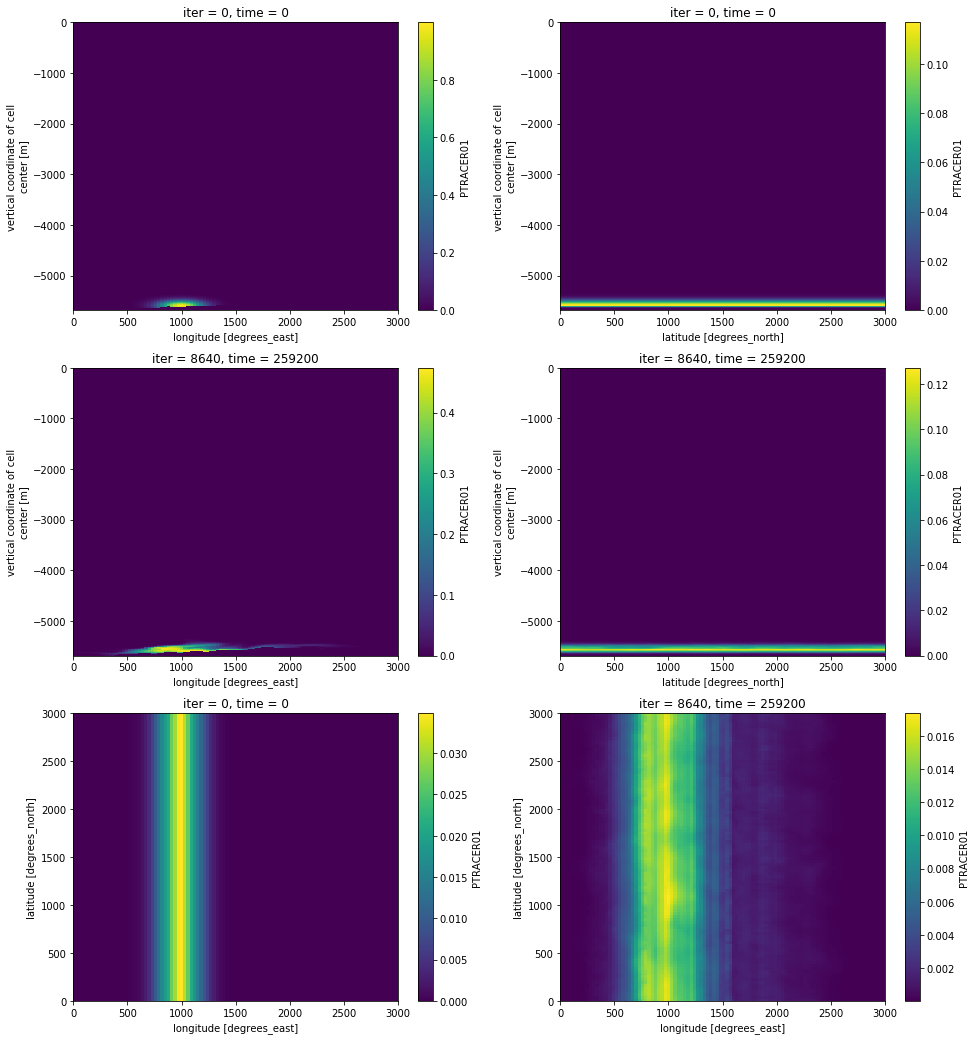

In [23]:
plt.figure(figsize=(16,18))
plt.subplot(3,2,1)
q = ds['PTRACER01'].sel(time=ds['time'][0]).mean(dim="YC").plot()
plt.subplot(3,2,2)
q = ds['PTRACER01'].sel(time=ds['time'][0]).mean(dim="XC").plot()

plt.subplot(3,2,3)
q = ds['PTRACER01'].sel(time=ds['time'][-1]).mean(dim="YC").plot()
plt.subplot(3,2,4)
q = ds['PTRACER01'].sel(time=ds['time'][-1]).mean(dim="XC").plot()

plt.subplot(3,2,5)
q = ds['PTRACER01'].sel(time=ds['time'][0]).mean(dim="Z").plot()
plt.subplot(3,2,6)
q = ds['PTRACER01'].sel(time=ds['time'][-1]).mean(dim="Z").plot()

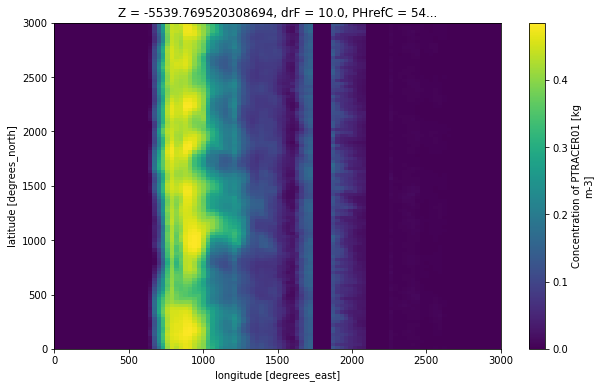

In [38]:
q = ds['PTRACER01'].sel(time=ds['time'][-1]).sel(Z=ds['Z'][-15]).plot()


In [6]:
data_dir = "/nobackup1/hdrake/mitgcm_static/TurbulentCirculation/setups/wavynikurashinlegg_tracer_3D_NH/run"
ds = open_mdsdataset(data_dir,ignore_unknown_vars=True,prefix=["standardDiag","thDiag"])
ds['time'] = ds['time']*30 # convert from iterations to seconds
ds['TOTTTEND'] = ds['TOTTTEND']/86400. # convert units to /sec from /day
grid = xgcm.Grid(ds, periodic=['X','Y'])


(-5800, -5000)

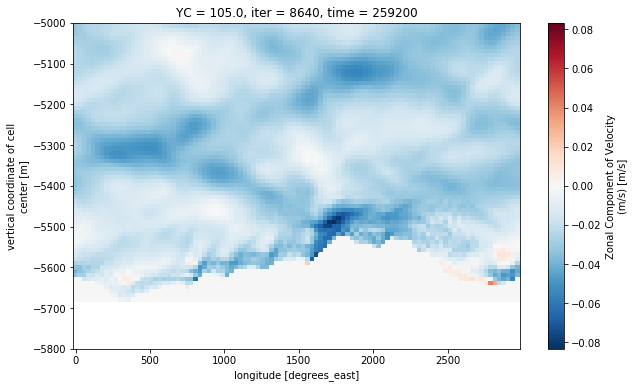

In [9]:
ds.UVEL.sel(YC=105.,time=ds.time[-1]).plot()
plt.ylim([-5800,-5000])

(-5800, -5000)

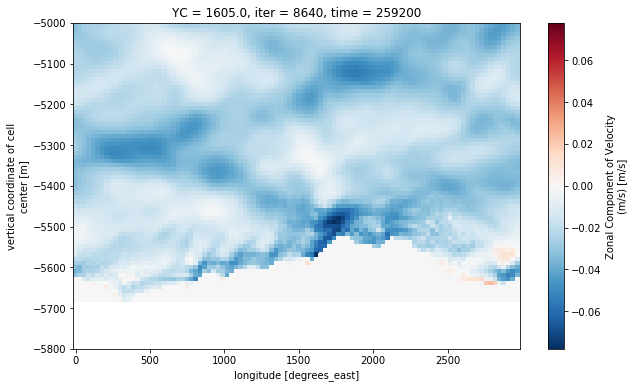

In [11]:
ds.UVEL.sel(YC=105.+(30*50),time=ds.time[-1]).plot()
plt.ylim([-5800,-5000])

(-5800, -5000)

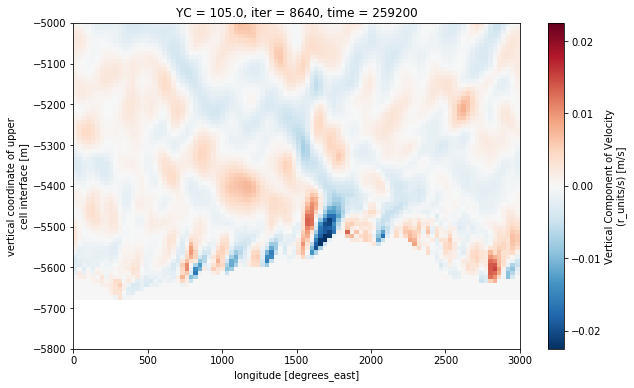

In [12]:
ds.WVEL.sel(YC=105.,time=ds.time[-1]).plot()
plt.ylim([-5800,-5000])

(-5800, -5000)

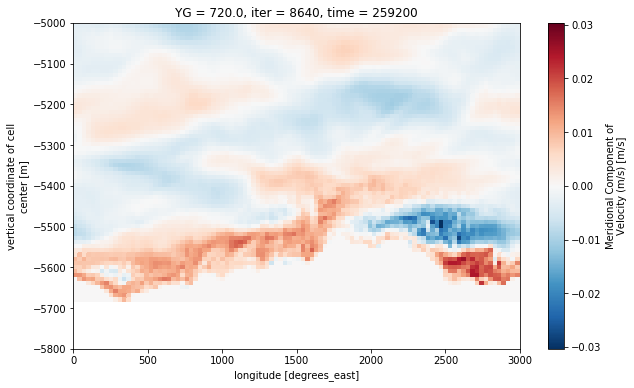

In [13]:
ds.VVEL.sel(YG=120+(30*20),time=ds.time[-1]).plot()
plt.ylim([-5800,-5000])

(-5800, -5000)

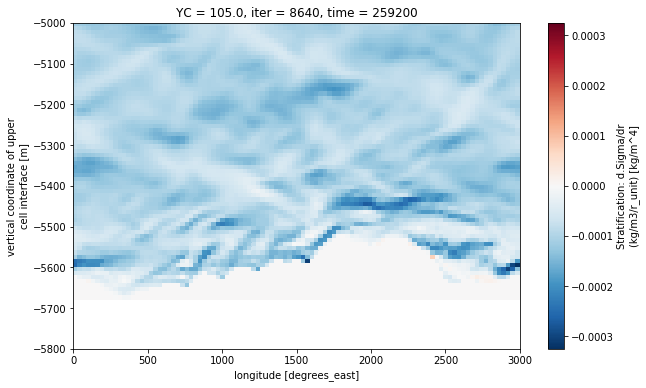

In [16]:
ds.DRHODR.sel(YC=105.,time=ds.time[-1]).plot()
plt.ylim([-5800,-5000])

(15, 2985)

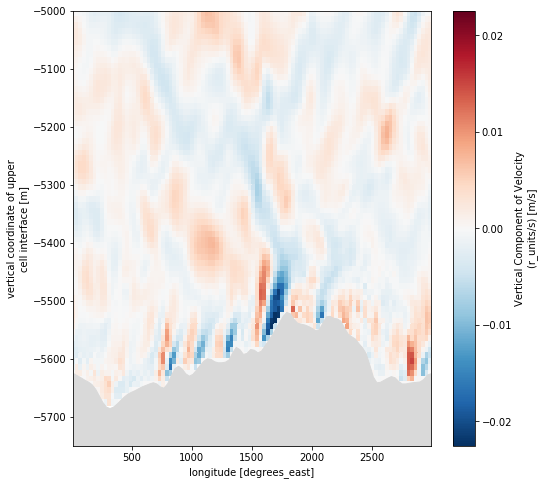

In [17]:
plt.figure(figsize=(8,8))
plt.clf()
variable = 'WVEL'

Q = ds[variable].sel(time=ds['time'][-1],YC=105.).plot(); plt.title('');
plt.fill_between(ds.XC.squeeze(),-6000*np.ones_like(ds.Depth.sel(YC=105.).squeeze()),-ds.Depth.sel(YC=105.).squeeze(),color=(0.85,0.85,0.85));
plt.ylim([-5750,-5000])
plt.xlim([15,2985])

In [26]:
plt.figure(figsize=(8,8))
plt.clf()
variable = 'WVEL'

var = ds[variable].sel(time=ds['time'][75],Zl=ds.Zl[-30])

Q = var.plot(); plt.title('');
#plt.ylim([-5750,-5000])
#plt.xlim([15,2985])

FileNotFoundError: [Errno 2] No such file or directory: '/nobackup1/hdrake/mitgcm_static/TurbulentCirculation/setups/wavynikurashinlegg_tracer_3D_NH/run/standardDiag.0000009120.data'

<Figure size 576x576 with 0 Axes>

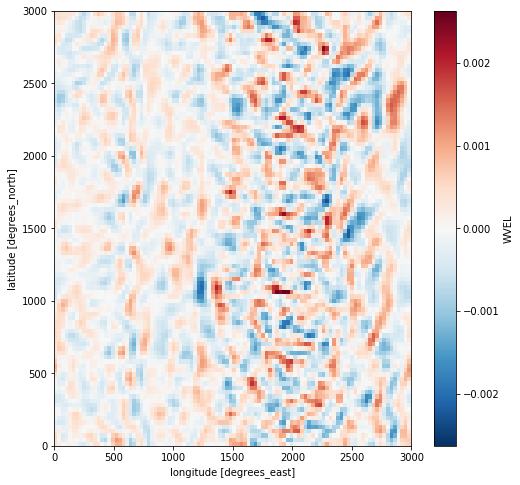

In [19]:
plt.figure(figsize=(8,8))
plt.clf()
variable = 'WVEL'

var = ds[variable].sel(time=ds['time'][-1],Zl=ds.Zl[-30]) - ds[variable].sel(time=ds['time'][-1],Zl=ds.Zl[-30]).mean(dim='YC')

Q = var.plot(); plt.title('');
#plt.ylim([-5750,-5000])
#plt.xlim([15,2985])

In [11]:
ds.WVEL

<xarray.DataArray 'WVEL' (time: 37, Zl: 350, YC: 100, XC: 100)>
dask.array<shape=(37, 350, 100, 100), dtype=float64, chunksize=(1, 350, 100, 100)>
Coordinates:
  * XC       (XC) >f8 15.0 45.0 75.0 105.0 135.0 165.0 195.0 225.0 255.0 ...
  * YC       (YC) >f8 15.0 45.0 75.0 105.0 135.0 165.0 195.0 225.0 255.0 ...
  * Zl       (Zl) >f8 0.0 -72.45 -143.5 -213.1 -281.4 -348.3 -413.9 -478.3 ...
    rA       (YC, XC) >f8 dask.array<shape=(100, 100), chunksize=(100, 100)>
    Depth    (YC, XC) >f8 dask.array<shape=(100, 100), chunksize=(100, 100)>
    iter     (time) int64 dask.array<shape=(37,), chunksize=(1,)>
  * time     (time) int64 3600 7200 10800 14400 18000 21600 25200 28800 ...
Attributes:
    standard_name:  WVEL
    long_name:      Vertical Component of Velocity (r_units/s)
    units:          m/s

In [12]:
ds.Z[-30]

<xarray.DataArray 'Z' ()>
array(-5389.76952)
Coordinates:
    Z        >f8 -5.39e+03
    drF      >f8 dask.array<shape=(), chunksize=()>
    PHrefC   >f8 dask.array<shape=(), chunksize=()>
Attributes:
    standard_name:  depth
    long_name:      vertical coordinate of cell center
    units:          m
    positive:       down
    axis:           Z

AttributeError: 'tuple' object has no attribute 'set_clim'

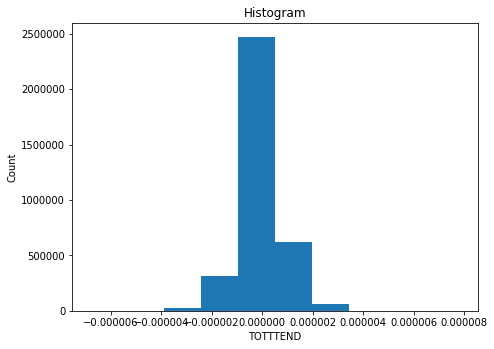

In [28]:
cellV = ds.rA * ds.drF * ds.hFacC
lim = 5e-9

plt.figure(figsize=(16,18))
plt.subplot(3,2,1)
q = ds['TOTTTEND'].sel(time=ds['time'][-1]).plot()
q.set_clim([-5*lim,5*lim])
plt.fill_between(ds.XC.squeeze(),-6000*np.ones_like(ds.Depth.squeeze()),-ds.Depth.squeeze(),color=(0.85,0.85,0.85));
plt.xlim([0,60000])
plt.ylim([-5700,-3500])
plt.title('Time tendency')

plt.subplot(3,2,2)
ds['ADV_TEND'] = -(-grid.diff(ds.ADVr_TH, axis='Z', boundary='fill') + grid.diff(ds.ADVx_TH, axis='X'))/cellV
q = ds['ADV_TEND'].sel(time=ds['time'][-1]).plot()
q.set_clim([-5*lim,5*lim])
plt.fill_between(ds.XC.squeeze(),-6000*np.ones_like(ds.Depth.squeeze()),-ds.Depth.squeeze(),color=(0.85,0.85,0.85));
plt.xlim([0,60000])
plt.ylim([-5700,-3500])
plt.title('Advective tendency')

plt.subplot(3,2,3)
# This is a TEMPORARY fix and not the right way to mask the vertical fluxes at the boundary!
# This is a bug in the way the fluxes are calculated and diagnosed -- they are not masked until the divergence step!
# Here we assume hFacC is a reasonable mask, but this is not true with partial cells.
ds['hFacR'] = ds['DFrE_TH'].sel(time=ds['time'][-1])
ds['hFacR'].values = ds['hFacC'].values

ds['DF_TEND'] = -(-grid.diff(ds.DFrE_TH*ds['hFacR'], axis='Z', boundary='fill') + grid.diff(ds.DFxE_TH, axis='X'))/cellV
q = ds['DF_TEND'].sel(time=ds['time'][-1]).plot()
q.set_clim([-lim,lim])
plt.fill_between(ds.XC.squeeze(),-6000*np.ones_like(ds.Depth.squeeze()),-ds.Depth.squeeze(),color=(0.85,0.85,0.85));
plt.xlim([0,60000])
plt.ylim([-5700,-3500])
plt.title('Diffusive tendency')

plt.subplot(3,2,4)
q = ds['gT_Forc'].sel(time=ds['time'][-1]).plot()
q.set_clim([-lim*5,lim*5])
plt.fill_between(ds.XC.squeeze(),-6000*np.ones_like(ds.Depth.squeeze()),-ds.Depth.squeeze(),color=(0.85,0.85,0.85));
plt.xlim([0,60000])
plt.ylim([-5700,-3500])
plt.title('Temperature tendency due to forcing')

plt.subplot(3,2,5)
q = ds['UDIAG1'].sel(time=ds['time'][-1]).plot()
q.set_clim([0,1e-9])
plt.fill_between(ds.XC.squeeze(),-6000*np.ones_like(ds.Depth.squeeze()),-ds.Depth.squeeze(),color=(0.85,0.85,0.85));
plt.xlim([0,60000])
plt.ylim([-5700,-3500])
plt.title('Kinetic Energy Dissipation')

plt.subplot(3,2,6)
q = (-ds['DRHODR']).sel(time=ds['time'][-1]).plot()
#q.set_clim([-lim,lim])
plt.fill_between(ds.XC.squeeze(),-6000*np.ones_like(ds.Depth.squeeze()),-ds.Depth.squeeze(),color=(0.85,0.85,0.85));
plt.xlim([0,60000])
plt.ylim([-5700,-3500])
plt.title('Stratification')

plt.tight_layout()

# Average budget of whole experiment

In [ ]:
cellV = ds.rA * ds.drF * ds.hFacC
lim = 5e-9

plt.figure(figsize=(16,18))
plt.subplot(3,2,1)
q = ds['TOTTTEND'].mean(dim="time").plot()
q.set_clim([-5*lim,5*lim])
plt.fill_between(ds.XC.squeeze(),-6000*np.ones_like(ds.Depth.squeeze()),-ds.Depth.squeeze(),color=(0.85,0.85,0.85));
plt.xlim([0,20000])
plt.ylim([-5700,-3500])
plt.title('Time tendency')

plt.subplot(3,2,2)
ds['ADV_TEND'] = -(-grid.diff(ds.ADVr_TH, axis='Z', boundary='fill') + grid.diff(ds.ADVx_TH, axis='X'))/cellV
q = ds['ADV_TEND'].mean(dim="time").plot()
q.set_clim([-5*lim,5*lim])
plt.fill_between(ds.XC.squeeze(),-6000*np.ones_like(ds.Depth.squeeze()),-ds.Depth.squeeze(),color=(0.85,0.85,0.85));
plt.xlim([0,20000])
plt.ylim([-5700,-3500])
plt.title('Advective tendency')

plt.subplot(3,2,3)
# This is a TEMPORARY fix and not the right way to mask the vertical fluxes at the boundary!
# This is a bug in the way the fluxes are calculated and diagnosed -- they are not masked until the divergence step!
# Here we assume hFacC is a reasonable mask, but this is not true with partial cells.
ds['hFacR'] = ds['DFrE_TH'].sel(time=ds['time'][-1])
ds['hFacR'].values = ds['hFacC'].values

ds['DF_TEND'] = -(-grid.diff(ds.DFrE_TH*ds['hFacR'], axis='Z', boundary='fill') + grid.diff(ds.DFxE_TH, axis='X'))/cellV
q = ds['DF_TEND'].mean(dim="time").plot()
q.set_clim([-lim,lim])
plt.fill_between(ds.XC.squeeze(),-6000*np.ones_like(ds.Depth.squeeze()),-ds.Depth.squeeze(),color=(0.85,0.85,0.85));
plt.xlim([0,20000])
plt.ylim([-5700,-3500])
plt.title('Diffusive tendency')

plt.subplot(3,2,4)
q = ds['gT_Forc'].mean(dim="time").plot()
#q.set_clim([-lim,lim])
plt.fill_between(ds.XC.squeeze(),-6000*np.ones_like(ds.Depth.squeeze()),-ds.Depth.squeeze(),color=(0.85,0.85,0.85));
plt.xlim([0,20000])
plt.ylim([-5700,-3500])
plt.title('Potential Temperature')

plt.subplot(3,2,5)
q = ds['UDIAG1'].mean(dim="time").plot()
q.set_clim([0,1e-9])
plt.fill_between(ds.XC.squeeze(),-6000*np.ones_like(ds.Depth.squeeze()),-ds.Depth.squeeze(),color=(0.85,0.85,0.85));
plt.xlim([0,20000])
plt.ylim([-5700,-3500])
plt.title('Kinetic Energy Dissipation')

plt.subplot(3,2,6)
q = (-ds['DRHODR']).mean(dim="time").plot()
#q.set_clim([-lim,lim])
plt.fill_between(ds.XC.squeeze(),-6000*np.ones_like(ds.Depth.squeeze()),-ds.Depth.squeeze(),color=(0.85,0.85,0.85));
plt.xlim([0,20000])
plt.ylim([-5700,-3500])
plt.title('Stratification')

plt.tight_layout()

# Circulation

In [ ]:
plt.figure(figsize=(16,16))
plt.clf()
variables = ['THETA',
            'DRHODR',
            'UVEL',
            'VVEL',
            'WVEL']

clims = [[0,2.5],
        [-1e-3,1e-3],
        [-0.02,0.02],
        [-0.05,0.05],
        [-0.002,0.002]]

for v in range(len(variables)):
    plt.subplot(3,2,v+1)
    if v>0: Q = ds[variables[v]].sel(time=ds['time'][-2:]).mean(dim="time").plot(); plt.title(''); Q.set_clim(clims[v]);
    else: Q = ds[variables[v]].sel(time=ds['time'][-2:]).mean(dim="time").squeeze().plot.contour(levels=np.arange(0,2,0.25),colors='k'); 
    plt.fill_between(ds.XC.squeeze(),-6000*np.ones_like(ds.Depth.squeeze()),-ds.Depth.squeeze(),color=(0.85,0.85,0.85));
    plt.ylim([-5500,-3500])
    plt.xlim([5000,25000])


# Zonal average stratification

In [ ]:
plt.plot(-grid.interp((ds['DRHODR']).sel(time=ds.time.values[:1]).mean(dim=["time"]).sum(dim="XC"),
                      axis="Z",boundary="fill")/(ds['hFacC'].sum(dim=["XC"])),ds['Z'], label = "initial stratification")
plt.plot(-grid.interp((ds['DRHODR']).sel(time=ds.time.values[-80:]).mean(dim=["time"]).sum(dim="XC"),
                      axis="Z",boundary="fill")/(ds['hFacC'].sum(dim=["XC"])),ds['Z'], label = "final stratification")
plt.plot([0,0],[-5800,-3000],"k--")
plt.legend()
plt.ylim([-5800,-3000])

# Stratification averaged zonally as a function of height above bottom

In [ ]:
import warnings
warnings.filterwarnings('ignore', '.*FutureWarning*.')
warnings.filterwarnings('ignore', '.*.')

In [ ]:
strat = np.zeros(100)
strat0 = np.zeros(100)
deps = np.arange(0,1000,10)
for i in range(len(ds.XC)):
    if (i%100==0): print(i, end=' ');
    strat0 += np.interp(deps,
                       (ds.Zl.values+ds.Depth.values[0,i])[::-1],
                       (ds['DRHODR'].sel(time=ds.time.values[:1],XC=ds.XC[i]).mean(dim=["time"]).squeeze())[::-1])/len(ds.XC)
    strat += np.interp(deps,
                       (ds.Zl.values+ds.Depth.values[0,i])[::-1],
                       (ds['DRHODR'].sel(time=ds.time.values[-80:],XC=ds.XC[i]).mean(dim=["time"]).squeeze())[::-1])/len(ds.XC)

In [ ]:
plt.title("Stratification changes over 50 day period")
plt.plot(-strat,deps,label="final stratification")
plt.plot(-strat0,deps,label="initial stratification")
plt.plot([0,0],[0,1000],"k--")
plt.ylim([0,1000])
plt.ylabel('Height above bottom (m)')
plt.xlabel(r'$\frac{\partial \rho}{\partial z}$',fontsize=22)
plt.legend()